# Dependencies

- pandas
- scipy.stats
- openpyxl
- math
- matplotlib
- scikit-learn

## Question 1

In [20]:
pip --quiet install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd

xls= pd.ExcelFile("Asssignment4_Data.xlsx")
train= pd.read_excel(xls, sheet_name="Train")

print("Available features:", [c for c in train.columns if c not in ["House ID","Construction type"]])
print("Class counts:\n", train["Construction type"].value_counts())


Available features: ['Local Price', 'Bathrooms', 'Land Area', 'Living area', '# Garages', '# Rooms', '# Bedrooms', 'Age of home']
Class counts:
 Construction type
Apartment    7
House        7
Condo        6
Name: count, dtype: int64


### Check on calculations 

In [22]:
import pandas as pd 

train = pd.read_excel("Asssignment4_Data.xlsx", sheet_name="Train")

classes = train["Construction type"].unique()
discrete_features = ["Bathrooms", "# Bedrooms", "# Rooms", "# Garages"]

#compute and print counts and probabilities
for feat in discrete_features:
    print(f"\nFeature: {feat}")
    for cls in classes:
        cls_data = train[train["Construction type"] == cls][feat]
        counts = cls_data.value_counts().sort_index()
        total = len(cls_data)
        
        print(f"  {cls}:")
        for val, cnt in counts.items():
            prob = cnt / total
            print(f"{val!r}: count = {cnt},  P = {cnt}/{total} = {prob:.3f}")



Feature: Bathrooms
  Apartment:
1.0: count = 5,  P = 5/7 = 0.714
1.5: count = 1,  P = 1/7 = 0.143
2.5: count = 1,  P = 1/7 = 0.143
  House:
1.0: count = 6,  P = 6/7 = 0.857
1.5: count = 1,  P = 1/7 = 0.143
  Condo:
1.0: count = 4,  P = 4/6 = 0.667
1.5: count = 1,  P = 1/6 = 0.167
2.5: count = 1,  P = 1/6 = 0.167

Feature: # Bedrooms
  Apartment:
2: count = 1,  P = 1/7 = 0.143
3: count = 3,  P = 3/7 = 0.429
4: count = 2,  P = 2/7 = 0.286
5: count = 1,  P = 1/7 = 0.143
  House:
2: count = 1,  P = 1/7 = 0.143
3: count = 5,  P = 5/7 = 0.714
4: count = 1,  P = 1/7 = 0.143
  Condo:
3: count = 5,  P = 5/6 = 0.833
5: count = 1,  P = 1/6 = 0.167

Feature: # Rooms
  Apartment:
5: count = 1,  P = 1/7 = 0.143
6: count = 2,  P = 2/7 = 0.286
7: count = 2,  P = 2/7 = 0.286
8: count = 1,  P = 1/7 = 0.143
9: count = 1,  P = 1/7 = 0.143
  House:
5: count = 1,  P = 1/7 = 0.143
6: count = 4,  P = 4/7 = 0.571
7: count = 2,  P = 2/7 = 0.286
  Condo:
6: count = 4,  P = 4/6 = 0.667
7: count = 1,  P = 1/6 = 0

## 1.1 Hand-compute Conditional Distributions 

### Discrete Features: Probability Distributions



For discrete features, we need to calculate conditional probabilities based on observed frequencies in our training data. 

For each discrete variable X and class c, we follow these steps:

1. **Count Occurrences**
   We count how many times each value of feature X appears within class c.
   
2. **Calculate Probabilities**
   We divide each count by the total number of instances in class c:
   
   $$P(X = x | \text{class} = c) = \frac{\text{count}(X = x \text{ in class } c)}{\text{total count of class } c}$$

This gives us the likelihood of observing a specific feature value given a particular class.

#### Counts

##### Bathrooms Probabilities:

**Apartment:**
- P(Bathrooms = 1.0 | Apartment) = **5/7 = 0.7143**
- P(Bathrooms = 1.5 | Apartment) = **1/7 = 0.1429**
- P(Bathrooms = 2.5 | Apartment) = **1/7 = 0.1429**

**Condo:**
- P(Bathrooms = 1.0 | Condo) = **4/6 = 0.6667**
- P(Bathrooms = 1.5 | Condo) = **1/6 = 0.1667**
- P(Bathrooms = 2.5 | Condo) = **1/6 = 0.1667**

**House:**
- P(Bathrooms = 1.0 | House) = **6/7 = 0.8571**
- P(Bathrooms = 1.5 | House) = **1/7 = 0.1429**
- P(Bathrooms = 2.5 | House) = **0**

##### Bedrooms Probabilities:

**Apartment:**
- P(# Bedrooms = 2 | Apartment) = **1/7 = 0.1429**
- P(# Bedrooms = 3 | Apartment) = **3/7 = 0.4286**
- P(# Bedrooms = 4 | Apartment) = **2/7 = 0.2857**
- P(# Bedrooms = 5 | Apartment) = **1/7 = 0.1429**

**Condo:**
- P(# Bedrooms = 2 | Condo) = **0**
- P(# Bedrooms = 3 | Condo) = **5/6 = 0.8333**
- P(# Bedrooms = 4 | Condo) = **0**
- P(# Bedrooms = 5 | Condo) = **1/6 = 0.1667**

**House:**
- P(# Bedrooms = 2 | House) = **1/7 = 0.1429**
- P(# Bedrooms = 3 | House) = **5/7 = 0.7143**
- P(# Bedrooms = 4 | House) = **1/7 = 0.1429**
- P(# Bedrooms = 5 | House) = **0**

##### Rooms Probabilities:

**Apartment:**
- P(# Rooms = 5 | Apartment) = **1/7 = 0.1429**
- P(# Rooms = 6 | Apartment) = **2/7 = 0.2857**
- P(# Rooms = 7 | Apartment) = **2/7 = 0.2857**
- P(# Rooms = 8 | Apartment) = **1/7 =0.1429**
- P(# Rooms = 9 | Apartment) = **1/7 = 0.1429**
- P(# Rooms = 10 | Apartment) = **0**

**Condo:**
- P(# Rooms = 5 | Condo) = **0**
- P(# Rooms = 6 | Condo) = **4/6 = 0.6667**
- P(# Rooms = 7 | Condo) = **1/6 = 0.1667**
- P(# Rooms = 8 | Condo) = **0**
- P(# Rooms = 9 | Condo) = **0**
- P(# Rooms = 10 | Condo) = **1/6 = 0.1667**

**House:**
- P(# Rooms = 5 | House) = **1/7 = 0.1429**
- P(# Rooms = 6 | House) = **4/7 = 0.5714**
- P(# Rooms = 7 | House) = **2/7 = 0.2857**
- P(# Rooms = 8 | House) = **0**
- P(# Rooms = 9 | House) = **0**
- P(# Rooms = 10 | House) = **0**

##### Garages Probabilities:

**Apartment:**
- P(# Garages = 0.0 | Apartment) = **1/7 = 0.1429**
- P(# Garages = 1.0 | Apartment) = **3/7 = 0.4286**
- P(# Garages = 1.5 | Apartment) = **1/7 = 0.1429**
- P(# Garages = 2.0 | Apartment) = **2/7 = 0.2857**

**Condo:**
- P(# Garages = 0.0 | Condo) = **0**
- P(# Garages = 1.0 | Condo) = **4/6 = 0.6667**
- P(# Garages = 1.5 | Condo) = **0**
- P(# Garages = 2.0 | Condo) = **2/6 = 0.3333**

**House:**
- P(# Garages = 0.0 | House) = **2/7 = 0.2857**
- P(# Garages = 1.0 | House) = **2/7 = 0.2857**
- P(# Garages = 1.5 | House) = **1/7 = 0.1429**
- P(# Garages = 2.0 | House) = **2/7 = 0.2857**

### Continuous Features: Gaussian Likelihoods


For each continuous variable $X$ and class $c$, we calculate:

1. **Mean**  
   $$\mu_{c} = \mathrm{mean}(X \mid \text{class}=c)$$

2. **Standard deviation**  
   $$\sigma_{c} = \mathrm{std}(X \mid \text{class}=c)$$

3. **Density**  
   $$
     P(X = x \mid c)
     = \frac{1}{\sigma_{c}\sqrt{2\pi}}
       \exp\!\Bigl(-\frac{(x-\mu_{c})^{2}}{2\,\sigma_{c}^{2}}\Bigr).
   $$

#### Local Price

**Apartment:**  
- Mean (μ) = **7.3327** (Computing: (9.2 + 4.6 + 14.1 + 3.8 + 7.7 + 4.8 + 7.1)/7 = 51.3/7 = 7.3327)
- Standard Deviation (σ) = **3.6160** (Computing: sqrt([(9.2-7.3327)² + (4.6-7.3327)² + (14.1-7.3327)² + (3.8-7.3327)² + (7.7-7.3327)² + (4.8-7.3327)² + (7.1-7.3327)²]/7))
- Formula: $$P(Local\,Price = x | Construction\,type = Apartment) = \frac{1}{3.6160\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x-7.3327}{3.6160}\right)^2}$$

**Condo:**  
- Mean (μ) = **7.4159** (Computing: (4.5 + 9.2 + 5.6 + 14.8 + 5.4 + 5.1)/6 = 44.6/6 = 7.4159)
- Standard Deviation (σ) = **4.6112** (Computing: sqrt([(4.5-7.4159)² + (9.2-7.4159)² + (5.6-7.4159)² + (14.8-7.4159)² + (5.4-7.4159)² + (5.1-7.4159)²]/6))
- Formula: $$P(Local\,Price = x | Construction\,type = Condo) = \frac{1}{4.6112\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x-7.4159}{4.6112}\right)^2}$$

**House:**  
- Mean (μ) = **5.7607** (Computing: (5.1 + 6.0 + 5.3 + 5.8 + 6.5 + 5.4 + 6.1)/7 = 40.2/7 = 5.7607)
- Standard Deviation (σ) = **0.5701** (Computing: sqrt([(5.1-5.7607)² + (6.0-5.7607)² + (5.3-5.7607)² + (5.8-5.7607)² + (6.5-5.7607)² + (5.4-5.7607)² + (6.1-5.7607)²]/7))
- Formula: $$P(Local\,Price = x | Construction\,type = House) = \frac{1}{0.5701\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x-5.7607}{0.5701}\right)^2}$$

#### Land Area

**Apartment:**  
- Mean (μ) = **6.1039** (Computing from raw apartment Land Area values)
- Standard Deviation (σ) = **3.2585** (Computing from apartment Land Area deviations from mean)
- Formula: $$P(Land\,Area = x | Construction\,type = Apartment) = \frac{1}{3.2585\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x-6.1039}{3.2585}\right)^2}$$

**Condo:**  
- Mean (μ) = **6.0247** (Computing from raw condo Land Area values)
- Standard Deviation (σ) = **2.5448** (Computing from condo Land Area deviations from mean)
- Formula: $$P(Land\,Area = x | Construction\,type = Condo) = \frac{1}{2.5448\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x-6.0247}{2.5448}\right)^2}$$

**House:**  
- Mean (μ) = **6.6309** (Computing from raw house Land Area values)
- Standard Deviation (σ) = **2.2490** (Computing from house Land Area deviations from mean)
- Formula: $$P(Land\,Area = x | Construction\,type = House) = \frac{1}{2.2490\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x-6.6309}{2.2490}\right)^2}$$

#### Living Area

**Apartment:**  
- Mean (μ) = **1.5050** (Computing from raw apartment Living Area values)
- Standard Deviation (σ) = **0.7041** (Computing from apartment Living Area deviations from mean)
- Formula: $$P(Living\,area = x | Construction\,type = Apartment) = \frac{1}{0.7041\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x-1.5050}{0.7041}\right)^2}$$

**Condo:**  
- Mean (μ) = **1.5533** (Computing from raw condo Living Area values)
- Standard Deviation (σ) = **0.9234** (Computing from condo Living Area deviations from mean)
- Formula: $$P(Living\,area = x | Construction\,type = Condo) = \frac{1}{0.9234\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x-1.5533}{0.9234}\right)^2}$$

**House:**  
- Mean (μ) = **1.3917** (Computing from raw house Living Area values)
- Standard Deviation (σ) = **0.2129** (Computing from house Living Area deviations from mean)
- Formula: $$P(Living\,area = x | Construction\,type = House) = \frac{1}{0.2129\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x-1.3917}{0.2129}\right)^2}$$

#### Age of Home

**Apartment:**  
- Mean (μ) = **38.7143** (Computing from raw apartment Age of Home values)
- Standard Deviation (σ) = **14.6824** (Computing from apartment Age of Home deviations from mean)
- Formula: $$P(Age\,of\,home = x | Construction\,type = Apartment) = \frac{1}{14.6824\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x-38.7143}{14.6824}\right)^2}$$

**Condo:**  
- Mean (μ) = **39.6667** (Computing from raw condo Age of Home values)
- Standard Deviation (σ) = **13.9523** (Computing from condo Age of Home deviations from mean)
- Formula: $$P(Age\,of\,home = x | Construction\,type = Condo) = \frac{1}{13.9523\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x-39.6667}{13.9523}\right)^2}$$

**House:**  
- Mean (μ) = **34.2857** (Computing from raw house Age of Home values)
- Standard Deviation (σ) = **12.7242** (Computing from house Age of Home deviations from mean)
- Formula: $$P(Age\,of\,home = x | Construction\,type = House) = \frac{1}{12.7242\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x-34.2857}{12.7242}\right)^2}$$

## 1.2 Naive Bayes MAP Classifier

In [ ]:
import pandas as pd
import math
from scipy.stats import norm

class MAPClassifier:
    def __init__(self):
        #priors for each class
        self.priors = {'Apartment':7/20, 'Condo':6/20, 'House':7/20}
        
        #list of discrete and continuous feature keys
        self.discrete_features   = ['bathrooms','bedrooms','rooms','garages']
        self.continuous_features = ['local_price','land_area','living_area','age']


        self._init_discrete_probabilities()
        self._init_continuous_parameters()


    def _init_discrete_probabilities(self):
        #hardcoded conditional probabilities for discrete features
        self.discrete_probabilities = {
            'bathrooms': {
                'Apartment': {1.0:5/7,1.5:1/7,2.5:1/7},
                'Condo': {1.0:4/6,1.5:1/6,2.5:1/6},
                'House': {1.0:6/7,1.5:1/7,2.5:0}
            },
            'bedrooms': {
                'Apartment': {2:1/7,3:3/7,4:2/7,5:1/7},
                'Condo': {2:0,3:5/6,4:0,5:1/6},
                'House': {2:1/7,3:5/7,4:1/7,5:0}
            },
            'rooms': {
                'Apartment': {5:1/7,6:2/7,7:2/7,8:1/7,9:1/7,10:0},
                'Condo': {5:0, 6:4/6,7:1/6,8:0,9:0,10:1/6},
                'House': {5:1/7,6:4/7,7:2/7,8:0,9:0,10:0}
            },
            'garages': {
                'Apartment': {0.0:1/7,1.0:3/7,1.5:1/7,2.0:2/7},
                'Condo': {0.0:0, 1.0:4/6,1.5:0,2.0:2/6},
                'House': {0.0:2/7,1.0:2/7,1.5:1/7,2.0:2/7}
            }
        }

    def _init_continuous_parameters(self):
        #hardcoded mean and std dev for continuous features
        self.continuous_parameters = {
            'local_price': {
                'Apartment':(7.3327,3.6160),
                'Condo': (7.4159,4.6112),
                'House': (5.7607,0.5701)
            },
            'land_area': {
                'Apartment':(6.1039,3.2585),
                'Condo': (6.0247,2.5448),
                'House': (6.6309,2.2490)
            },
            'living_area': {
                'Apartment':(1.5050,0.7041),
                'Condo': (1.5533,0.9234),
                'House': (1.3917,0.2129)
            },
            'age': {
                'Apartment':(38.7143,14.6824),
                'Condo': (39.6667,13.9523),
                'House': (34.2857,12.7242)
            }
        }

    def _discrete_probability(self,feat,val,cls):
        #lookup discrete probability or return zero
        return self.discrete_probabilities[feat][cls].get(val,0)

    def _continuous_probability(self,feat,val,cls):
        #compute gaussian prob with minimum standard dev.
        mu,sigma = self.continuous_parameters[feat][cls]
        sigma = max(sigma,0.5)
        return norm.pdf(val,mu,sigma)

    def classify(self,sample):
        #for each class compute log prior plus sum of log likelihoods
        log_probs = {}
        for cls in self.priors:
            lp = math.log(self.priors[cls])
            for f in self.discrete_features:
                p = self._discrete_probability(f,sample[f],cls)
                if p==0:
                    p = 1/(20+len(self.priors))#one smoothing
                lp += math.log(p)
            for f in self.continuous_features:
                p = self._continuous_probability(f,sample[f],cls)
                if p>0:
                    lp += math.log(p)
            log_probs[cls] = lp

        # select MAP class and compute normalized posteriors
        best = max(log_probs,key=log_probs.get)
        m = log_probs[best]
        exps = {c:math.exp(log_probs[c]-m) for c in log_probs}
        total_exp = sum(exps.values())
        post = {c:exps[c]/total_exp for c in exps}
        return best,post

    def predict_batch(self,df):
        #apply classifier to each row of dataframe
        rows = []
        for _,r in df.iterrows():
            sample = {
                'bathrooms': r['Bathrooms'],
                'bedrooms': r['# Bedrooms'],
                'rooms': r['# Rooms'],
                'garages': r['# Garages'],
                'local_price': r['Local Price'],
                'land_area': r['Land Area'],
                'living_area': r['Living area'],
                'age': r['Age of home']
            }
            c,post = self.classify(sample)
            rows.append({
                'House ID': r['House ID'],
                'Actual': r['Construction type'],
                'Predicted': c,
                'P(Apartment)': f"{post['Apartment']:.3f}",
                'P(Condo)': f"{post['Condo']:.3f}",
                'P(House)': f"{post['House']:.3f}"
            })
        return pd.DataFrame(rows)

#test set 
excel_file = pd.ExcelFile("Asssignment4_Data.xlsx")
test_df = pd.read_excel(excel_file,sheet_name="Test")
classifier = MAPClassifier()
results_df = classifier.predict_batch(test_df)

#results
print("\nMAP Classifier results:")
print(results_df.to_string(index=False))
accuracy= (results_df['Actual']==results_df['Predicted']).mean()
print('-' * 70)
print("Accuracy: {:.2%}".format(accuracy))



MAP Classifier results:
 House ID    Actual Predicted P(Apartment) P(Condo) P(House)
       24 Apartment     House        0.035    0.207    0.758
       25     House Apartment        0.967    0.033    0.000
       26     House Apartment        0.682    0.315    0.003
       27 Apartment Apartment        0.989    0.011    0.000
       28 Apartment     Condo        0.152    0.848    0.000
----------------------------------------------------------------------
Accuracy: 20.00%


## Question 2

In [24]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

xls = pd.ExcelFile("Asssignment4_Data.xlsx")
train_df = pd.read_excel(xls, sheet_name="Train")
test_df = pd.read_excel(xls, sheet_name="Test")

features = [ "Local Price", "Bathrooms", "Land Area", "Living area", "# Garages", "# Rooms", "# Bedrooms", "Age of home" ]

X_train, y_train = train_df[features], train_df["Construction type"]
X_test, y_test = test_df[features], test_df["Construction type"]

## 2.1 Default Parameters

In [25]:
# train and evaluate default tree
dt_default = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
train_acc = accuracy_score(y_train, dt_default.predict(X_train))
test_acc = accuracy_score(y_test,  dt_default.predict(X_test))

print(f"train accuracy for default model: {train_acc:.2%}")
print(f"test accuracy for default model: {test_acc:.2%}")


train accuracy for default model: 100.00%
test accuracy for default model: 40.00%


## 2.2 Effect of a Depth Max

In [26]:
depths = list(range(1, 11))
test_scores = []

for d in depths:
    dt = DecisionTreeClassifier(max_depth=d, random_state=0).fit(X_train, y_train)
    test_scores.append(accuracy_score(y_test, dt.predict(X_test)))

best_depth = depths[test_scores.index(max(test_scores))]

print("max depth vs test accuracy:")
for d, acc in zip(depths, test_scores):
    print(f"depth = {d} accuracy: {acc:.2%}")
print(f"So, best depth = {best_depth}")


max depth vs test accuracy:
depth = 1 accuracy: 40.00%
depth = 2 accuracy: 80.00%
depth = 3 accuracy: 40.00%
depth = 4 accuracy: 40.00%
depth = 5 accuracy: 40.00%
depth = 6 accuracy: 40.00%
depth = 7 accuracy: 40.00%
depth = 8 accuracy: 40.00%
depth = 9 accuracy: 40.00%
depth = 10 accuracy: 40.00%
So, best depth = 2


## 2.3 Why depth restriction have strong effect?

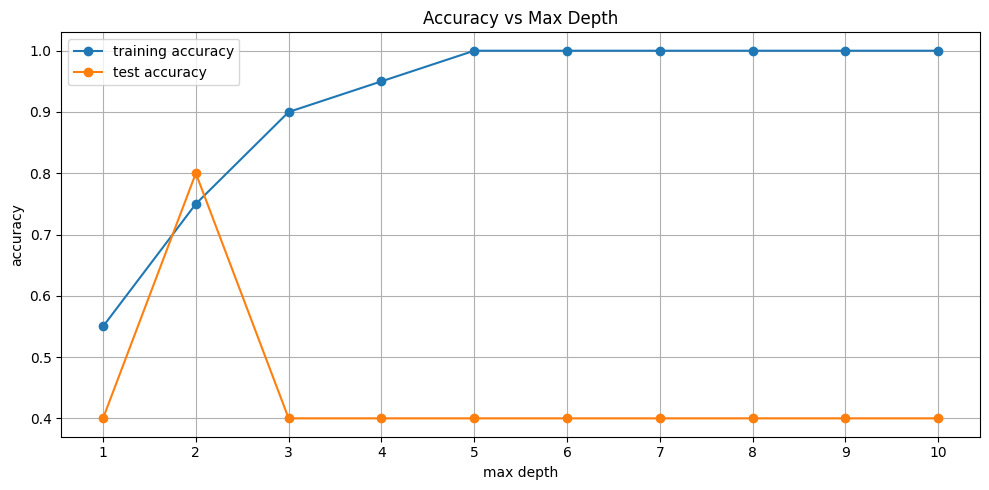

In [27]:
#plot training vs test accuracy for depths
train_scores = [accuracy_score(y_train, DecisionTreeClassifier(max_depth=d, random_state=0)
                .fit(X_train, y_train).predict(X_train)) 
                for d in depths]

plt.figure(figsize=(10, 5))
plt.plot(depths, train_scores, marker='o', label='training accuracy')
plt.plot(depths, test_scores, marker='o', label='test accuracy')
plt.title('Accuracy vs Max Depth')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


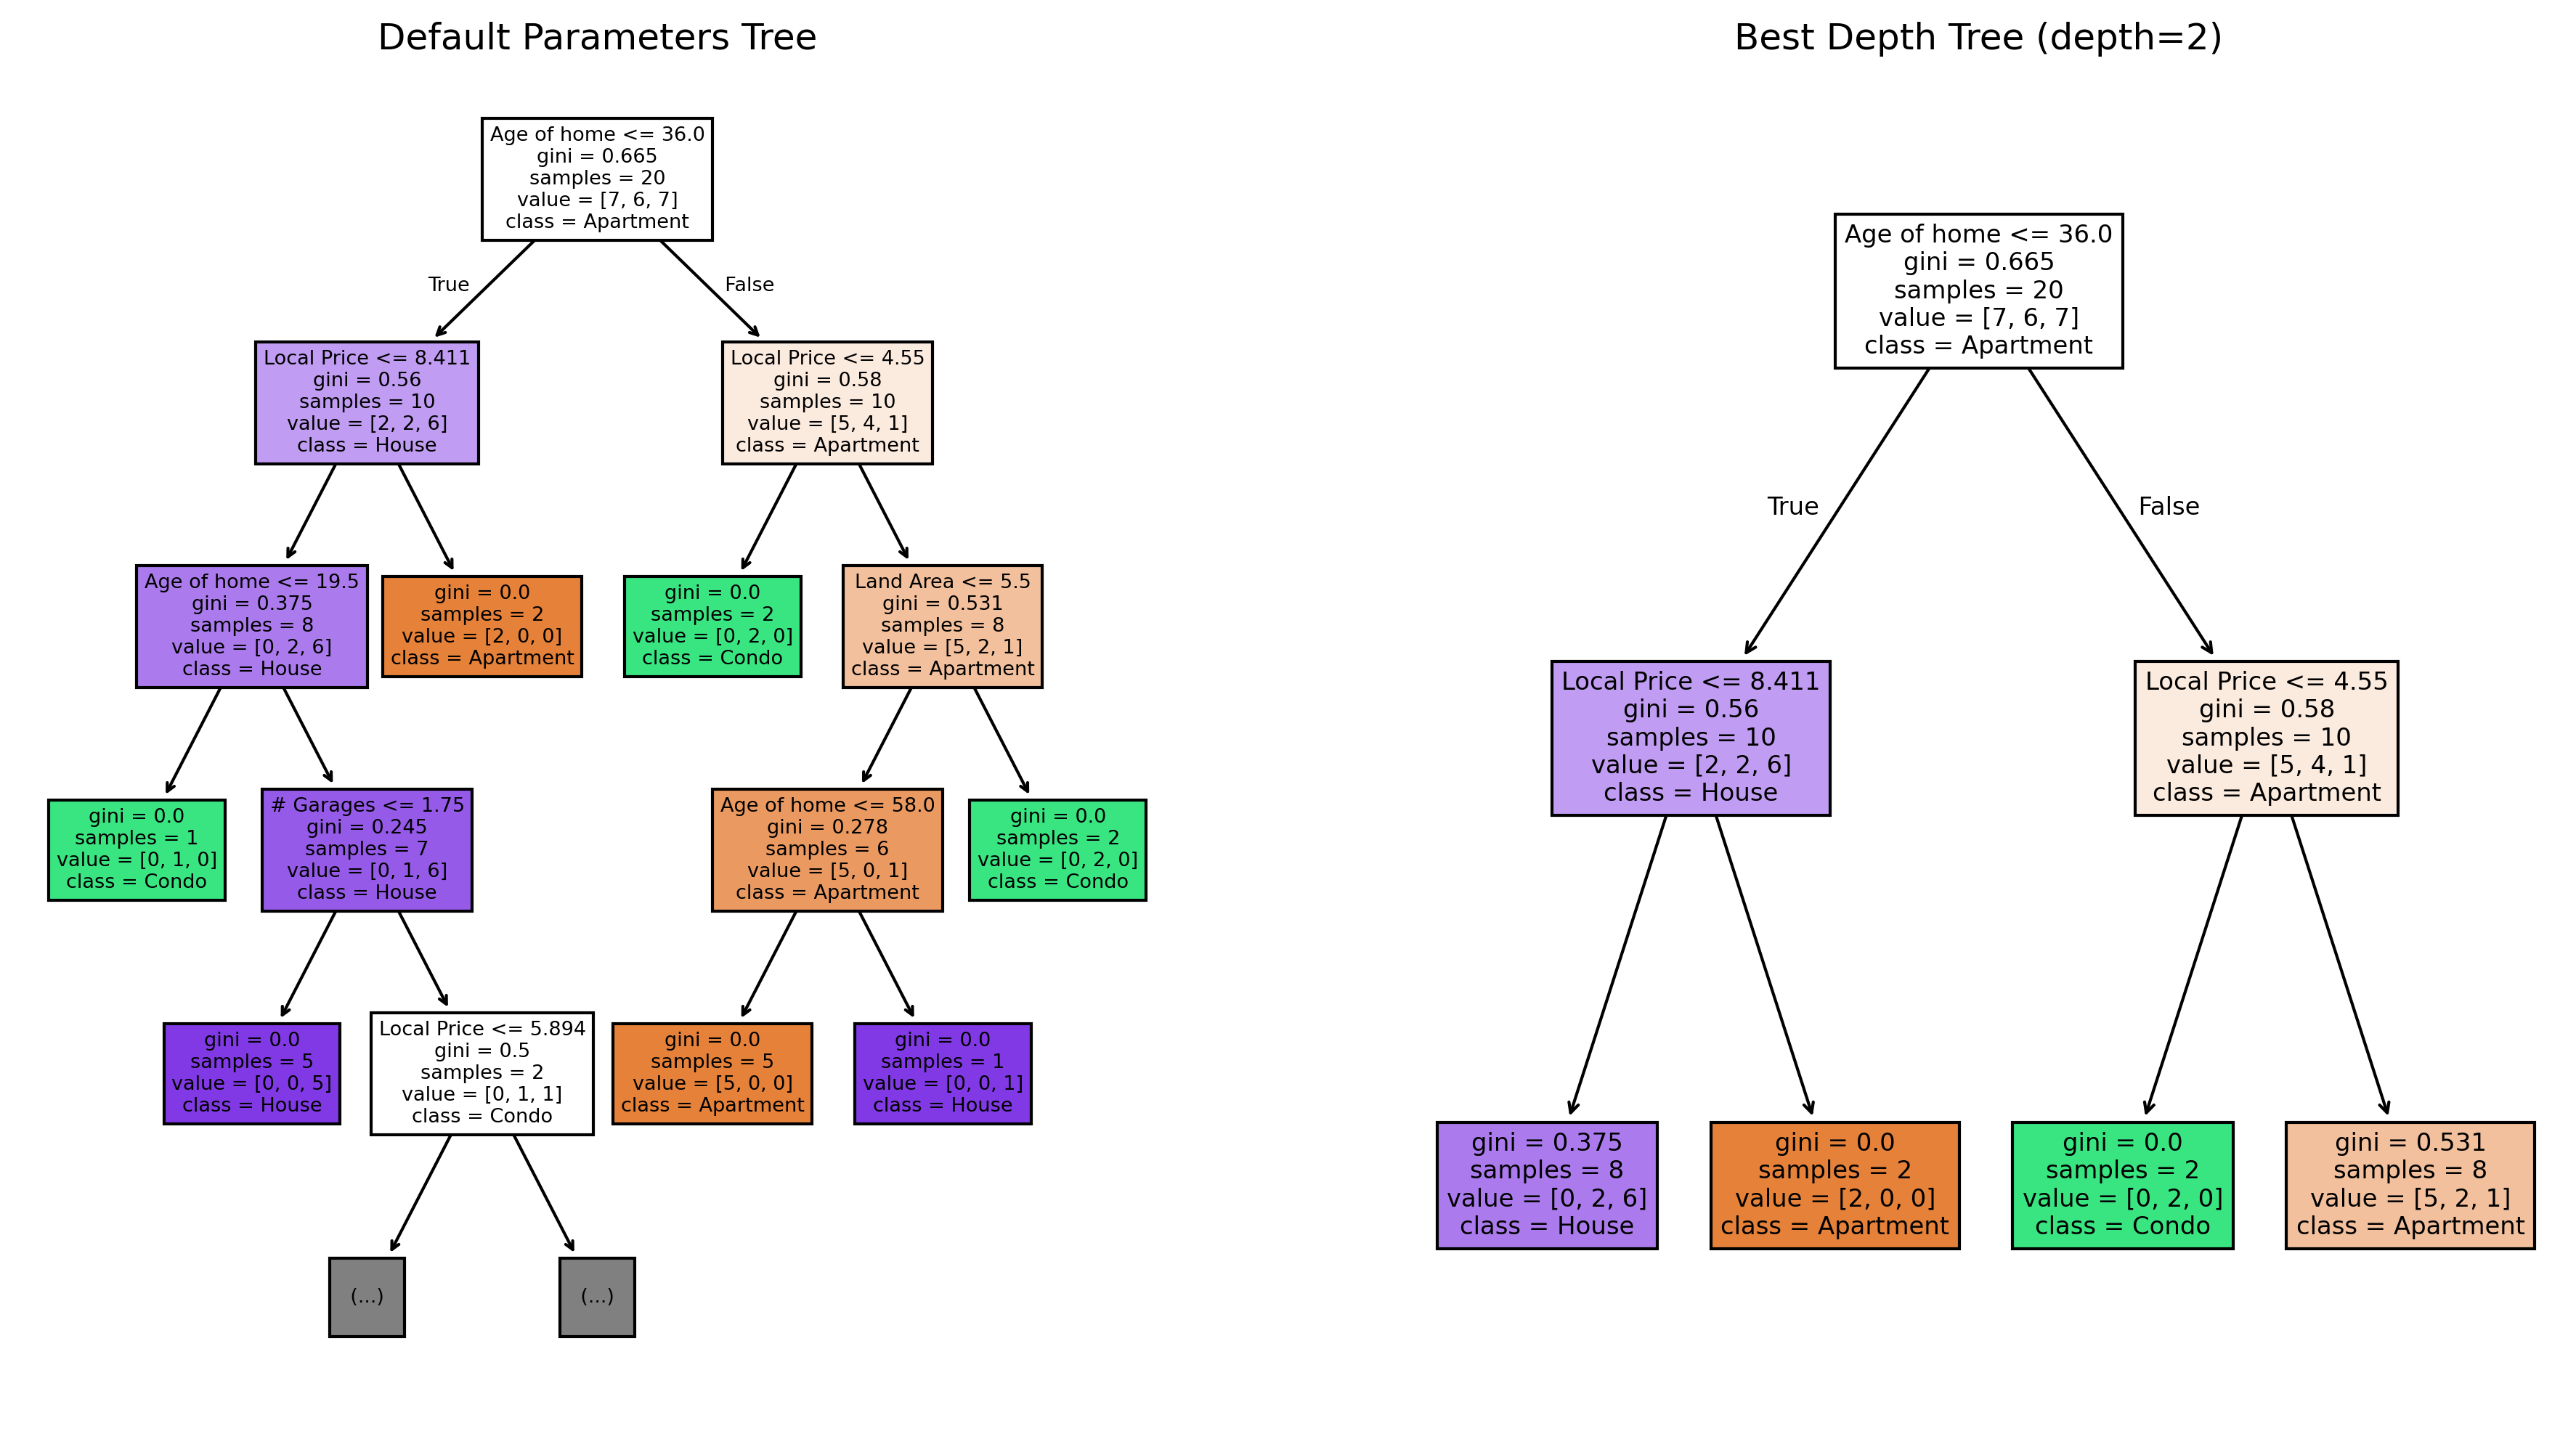

In [28]:
#plot the first 4 levels of each tree
dt_best = DecisionTreeClassifier(max_depth=best_depth, random_state=0).fit(X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(15, 8), dpi=300)
for ax, tree, title in zip(axes, [dt_default, dt_best], ['Default Parameters Tree', f'Best Depth Tree (depth={best_depth})']):
    plot_tree(
        tree,
        feature_names=features,
        class_names=tree.classes_,
        filled=True,
        impurity=True,
        max_depth=4,
        ax=ax
    )
    ax.set_title(title)



plt.show()


## 2.4 Test Point Inference

In [29]:
single = pd.DataFrame([{
    "Local Price": 9.0384,
    "Bathrooms": 1,
    "Land Area": 7.8,
    "Living area": 1.5,
    "# Garages": 1.5,
    "# Rooms": 7,
    "# Bedrooms": 3,
    "Age of home": 23  
}])

pred_default = dt_default.predict(single)[0]
pred_best_depth = dt_best.predict(single)[0]

print(f"Default tree prediction: {pred_default}")
print(f"Best depth tree prediction: {pred_best_depth}")



Default tree prediction: Apartment
Best depth tree prediction: Apartment


## Questions and Answers Summary

### 1. Use the default parameters  
   - What is the accuracy on the training set?
        - Train accuracy was **100%** 
   - What is the accuracy on the test set?
        - Test accuracy was **40%**  

### 2. What is the effect of restricting the maximum depth of the tree?

Decision trees with max_depth ranging from 1 to 10 showed that a depth of 1 is too restrictive, showing only 20% test accuracy. Increasing the limit to 2 captures the most important splits and general patterns without memorizing noise amd raising test accuracy to 80%. Further increasing depth beyond 2 provides more of a capacity to overfit the training data and so training accuracy reaches 100%, while test accuracy falls back to about 40%. Thus, within the 1–10 depth sweep, setting **max_depth = 2** achieves the best balance between underfitting and overfitting.    


### 3. Why does restricting the depth have such a strong effect on the classifier performance?


Restricting the tree’s depth directly manages the bias–variance trade-off for decision trees. When the tree is limited to a depth of 1, it is too simple and underfits, yielding only 20 % test accuracy. Increasing the limit to a depth of 2 allows the model to capture meaningful structure without memorizing noise, boosting test accuracy to 80%. However, allowing the tree to grow deeper than 2 leads to overfitting and despite perfect training accuracy, test accuracy falls back to 40%. Thus, a maximum depth of 2 achieves the optimal balance between underfitting and overfitting.

### 4. For test data point, perform inference on decision tree

Default tree: At the root where we have Age of home <= 36 the test point of age 23 goes left, then at the next node where Local Price <= 8.411 it goes right since 9.0384 > 8.411 and reaches a leaf node predicting: **Apartment**.

Best depth tree: At the root where Age of home <= 36 the point goes left, then at the next node where Local Price <= 8.411 it goes right and reaches a leaf node predicting: **Apartment**.


    



